<a href="https://colab.research.google.com/github/fidgetcat7/Mobile-Device-Usage-and-User-Behavior-Dataset/blob/main/Analysis_Model_Device_r.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ***Install & Download library***

In [1]:
install.packages("tidyverse")
install.packages("dplyr")
install.packages("ggplot2")
install.packages("caret")
install.packages("mlbench")
install.packages("psych")

library(tidyverse)
library(dplyr)
library(ggplot2)
library(caret)
library(mlbench)
library(psych)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘shape’, ‘future.apply’, ‘numDeriv’, ‘progressr’, ‘SQUAREM’, ‘diagram’, ‘lava’, ‘prodlim’, ‘proxy’, ‘iterators’, ‘clock’, ‘gower’, ‘hardhat’, ‘ipred’, ‘timeDate’, ‘e1071’, ‘foreach’, ‘ModelMetrics’, ‘plyr’, ‘pROC’, ‘recipes’, ‘reshape2’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘mnormt’, ‘GPArotation’


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ fo

## ***Preview data***

In [2]:
# read file csv
data <- read_csv('user_behavior_dataset.csv')

head(data)

Rows: 700 Columns: 11
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): Device Model, Operating System, Gender
dbl (8): User ID, App Usage Time (min/day), Screen On Time (hours/day), Batt...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4
2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3
3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2
4,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3
5,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3
6,Google Pixel 5,Android,99,2.0,940,35,564,31,Male,2


In [3]:
print(colnames(data))

 [1] "User ID"                    "Device Model"              
 [3] "Operating System"           "App Usage Time (min/day)"  
 [5] "Screen On Time (hours/day)" "Battery Drain (mAh/day)"   
 [7] "Number of Apps Installed"   "Data Usage (MB/day)"       
 [9] "Age"                        "Gender"                    
[11] "User Behavior Class"       


In [4]:
# Remove specific columns by name
str_data <- select(data, -`User ID`,-`Device Model`, -`Operating System`, -Gender)
data <- select(data, -`User ID`)

describe(str_data)

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
App Usage Time (min/day),1,700,271.128571,177.199484,227.5,262.283929,216.45960,30,598,568,0.37071771,-1.2641680,6.69751097
Screen On Time (hours/day),2,700,5.272714,3.068584,4.9,5.050357,3.55824,1,12,11,0.45802242,-0.8266697,0.11598157
Battery Drain (mAh/day),3,700,1525.158571,819.136414,1502.5,1502.339286,1132.70640,302,2993,2691,0.13398244,-1.2796693,30.96044632
Number of Apps Installed,4,700,50.681429,26.943324,49.0,50.123214,35.58240,10,99,89,0.11125484,-1.2595169,1.01836193
Data Usage (MB/day),5,700,929.742857,640.451729,823.5,865.682143,706.45890,102,2497,2395,0.69627042,-0.4728934,24.20680003
Age,6,700,38.482857,12.012916,38.0,38.451786,16.30860,18,59,41,0.02785453,-1.2396556,0.45404554
User Behavior Class,7,700,2.990000,1.401476,3.0,2.987500,1.48260,1,5,4,0.01774298,-1.2826946,0.05297081


In [5]:
# Identify categorical columns
categorical_cols <- sapply(data, is.character)

# Iterate over categorical columns and print value counts
for (col in names(categorical_cols)[categorical_cols]) {
  print(table(data[[col]]))
  print('')
}


    Google Pixel 5          iPhone 12          OnePlus 9 Samsung Galaxy S21 
               142                146                133                133 
      Xiaomi Mi 11 
               146 
[1] ""

Android     iOS 
    554     146 
[1] ""

Female   Male 
   336    364 
[1] ""


In [6]:
# Count the occurrences of each unique value in the 'User Behavior Class' column
data %>%
  count(`User Behavior Class`)

User Behavior Class,n
<dbl>,<int>
1,136
2,146
3,143
4,139
5,136


## ***Univariate Analysis***

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


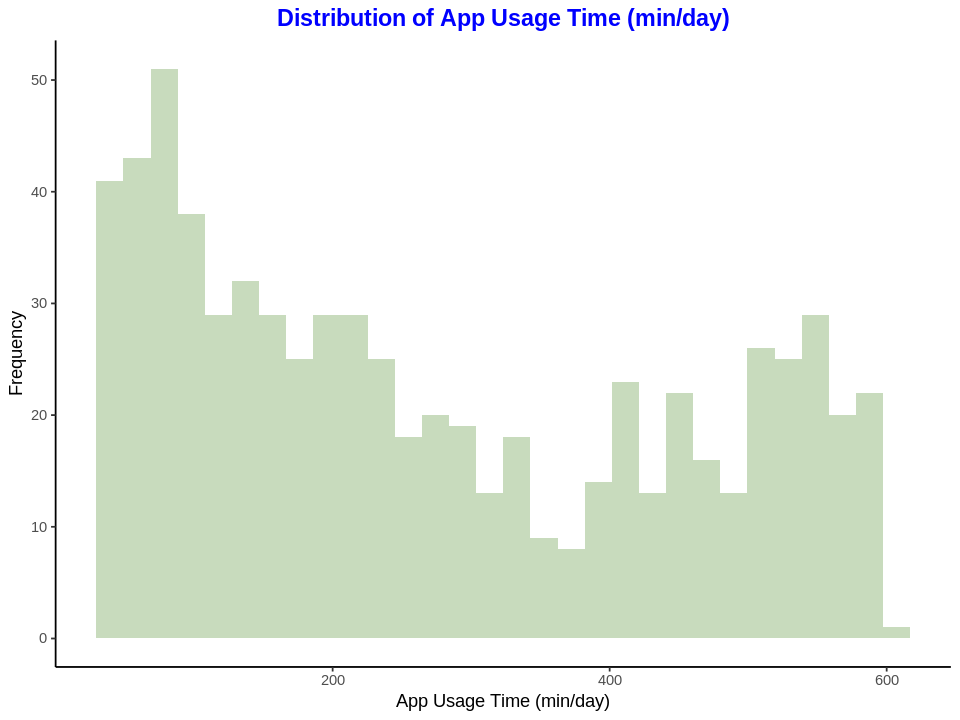

In [7]:
# Distributeion of App Usage Time (min/day)

options(repr.plot.width = 8, repr.plot.height = 6)
ggplot(data, mapping = aes(x = `App Usage Time (min/day)`)) +
    geom_histogram( fill = "#c8dbbd") +
    labs(title = "Distribution of App Usage Time (min/day)", x = "App Usage Time (min/day)", y = "Frequency") +
    theme_classic() +
    theme(plot.title = element_text(hjust = 0.5, size = 14, color = "Blue", face = "bold"))

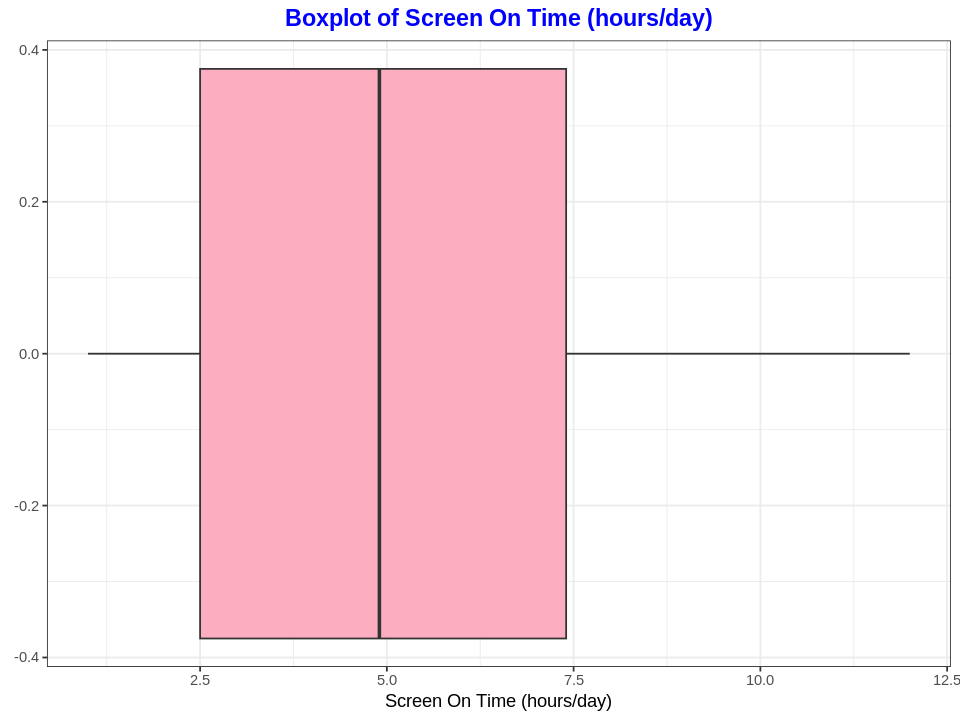

In [8]:
# Boxplot of Screen On Time (hours/day)

options(repr.plot.width = 8, repr.plot.height = 6)
ggplot(data, mapping = aes(x = `Screen On Time (hours/day)`)) +
    geom_boxplot( fill = "#fcadc0") +
    labs(title = "Boxplot of Screen On Time (hours/day)", x = "Screen On Time (hours/day)") +
    theme_bw() +
    theme(plot.title = element_text(hjust = 0.5, size = 14, color = "Blue", face = "bold"))

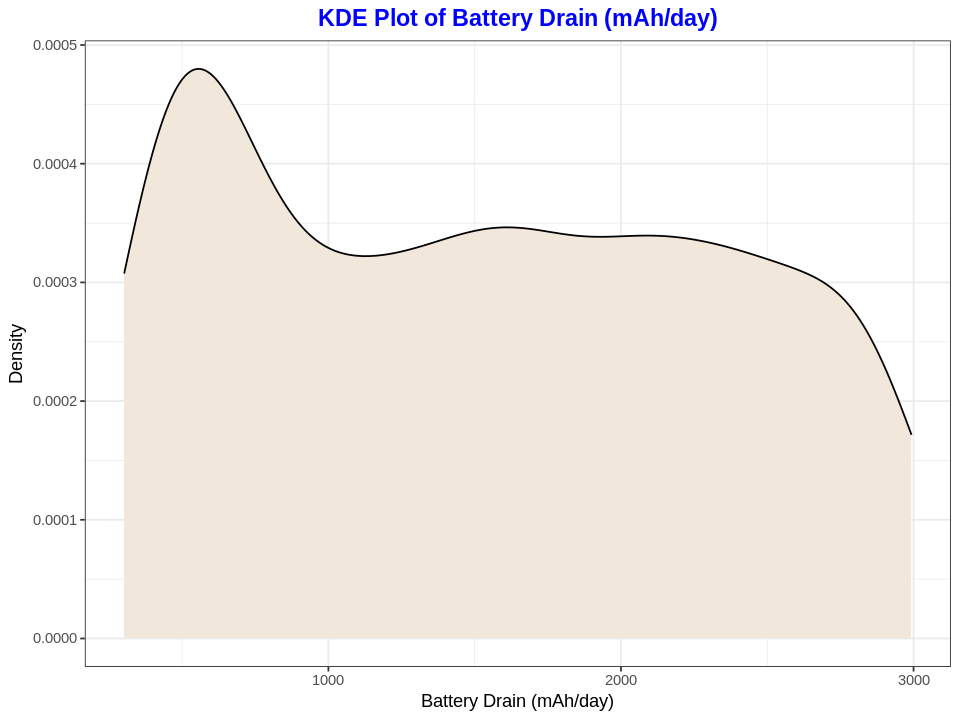

In [9]:
# KDE Plot of Battery Drain (mAh/day)

options(repr.plot.width = 8, repr.plot.height = 6)
ggplot(data, mapping = aes(x = `Battery Drain (mAh/day)`)) +
    geom_density( fill = "#f1e7db") +
    labs(title = "KDE Plot of Battery Drain (mAh/day)", x = "Battery Drain (mAh/day)", y = "Density") +
    scale_y_continuous(labels = scales::number_format(accuracy = 0.0001)) +
    theme_bw() +
    theme(plot.title = element_text(hjust = 0.5, size = 14, color = "Blue", face = "bold"))

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


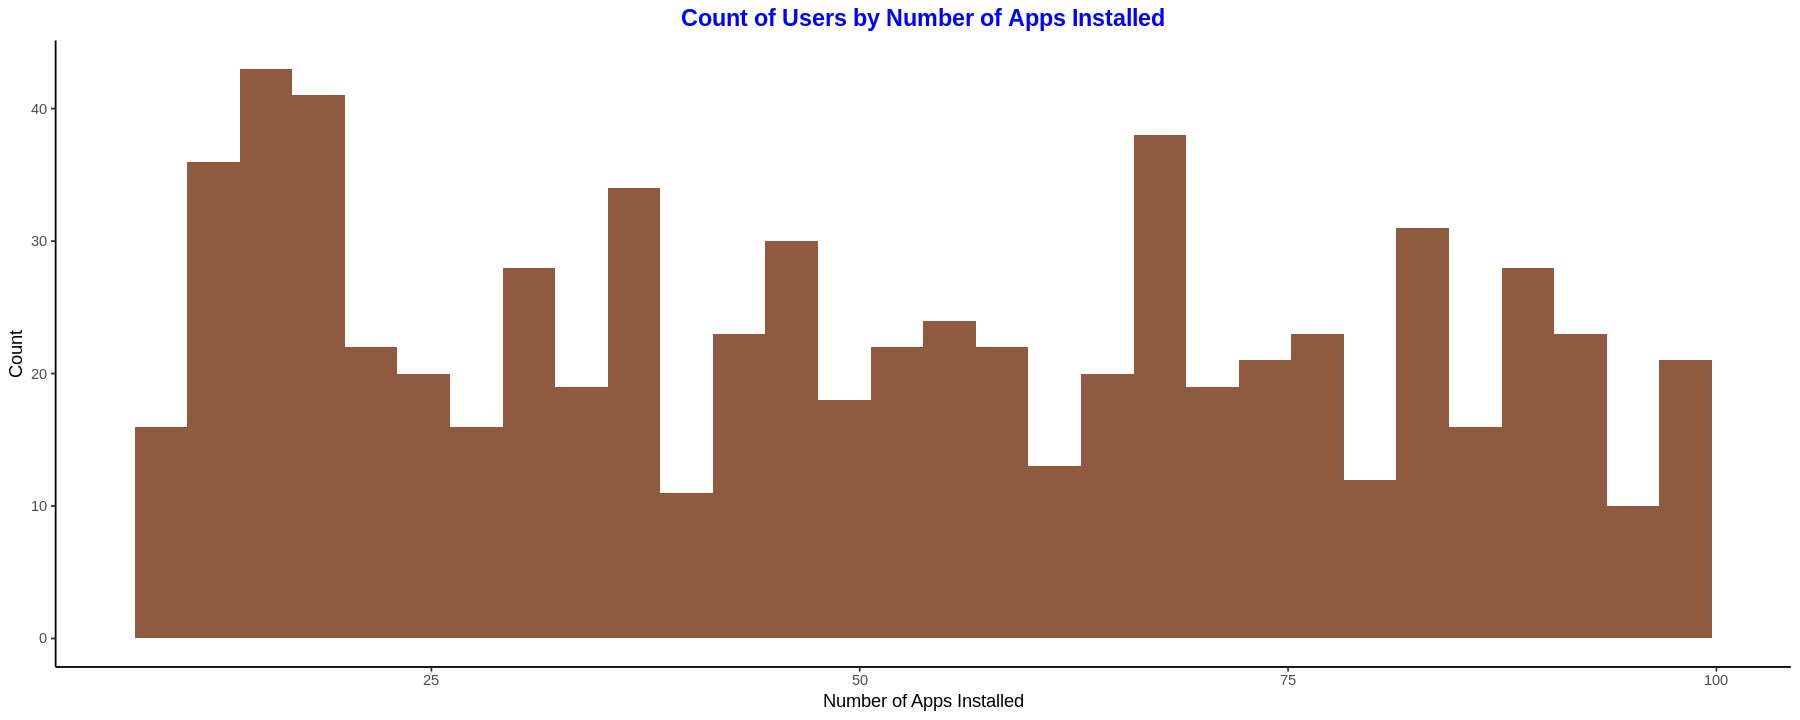

In [10]:
# Count of Users by Number of Apps Installed

options(repr.plot.width = 15, repr.plot.height = 6)
ggplot(data, mapping = aes(x = `Number of Apps Installed`)) +
  geom_histogram(fill = "#905a3e")+
  labs(title = "Count of Users by Number of Apps Installed", x = "Number of Apps Installed", y = "Count") +
  theme_classic() +
  theme(plot.title = element_text(hjust = 0.5, size = 14, color = "Blue", face = "bold"))

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


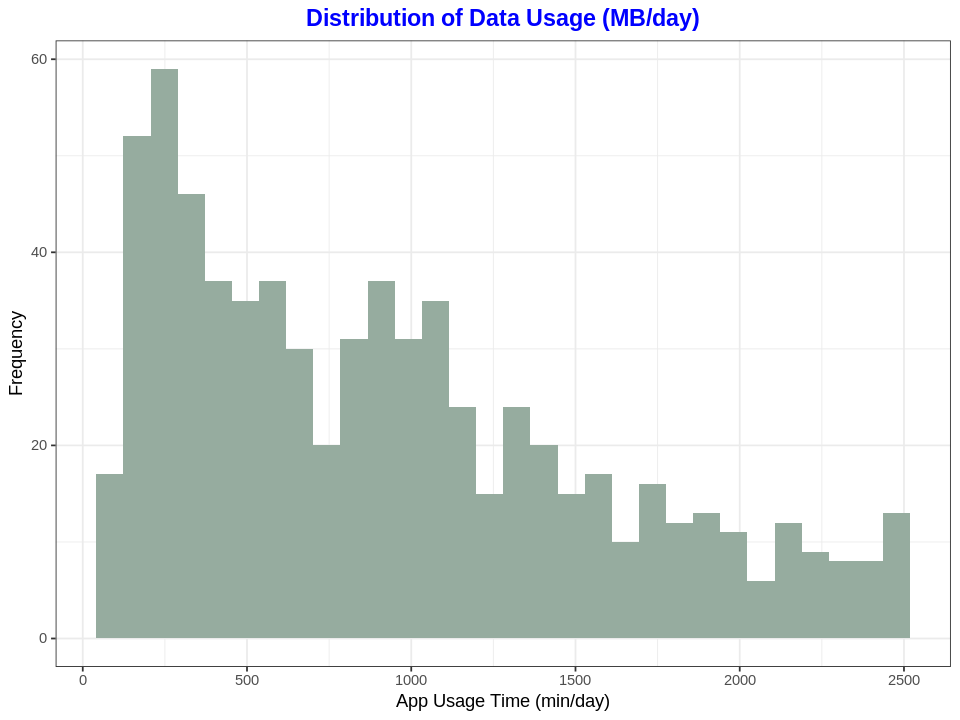

In [11]:
# Distributeion of Data Usage (MB/day)

options(repr.plot.width = 8, repr.plot.height = 6)
ggplot(data, mapping = aes(x = `Data Usage (MB/day)`)) +
    geom_histogram( fill = "#96ac9f") +
    labs(title = "Distribution of Data Usage (MB/day)", x = "App Usage Time (min/day)", y = "Frequency") +
    theme_bw() +
      theme(plot.title = element_text(hjust = 0.5, size = 14, color = "Blue", face = "bold"))

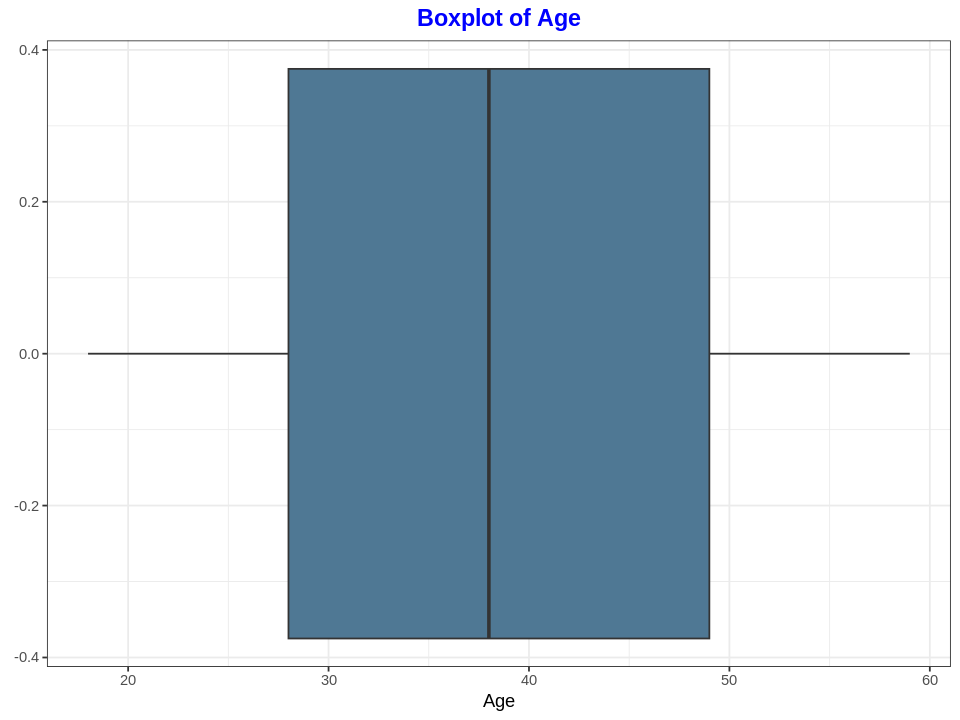

In [12]:
# Boxplot of Age

options(repr.plot.width = 8, repr.plot.height = 6)
ggplot(data, mapping = aes(x = `Age`)) +
    geom_boxplot( fill = "#4f7894") +
    labs(title = "Boxplot of Age", x = "Age") +
    theme_bw() +
    theme(plot.title = element_text(hjust = 0.5, size = 14, color = "Blue", face = "bold"))

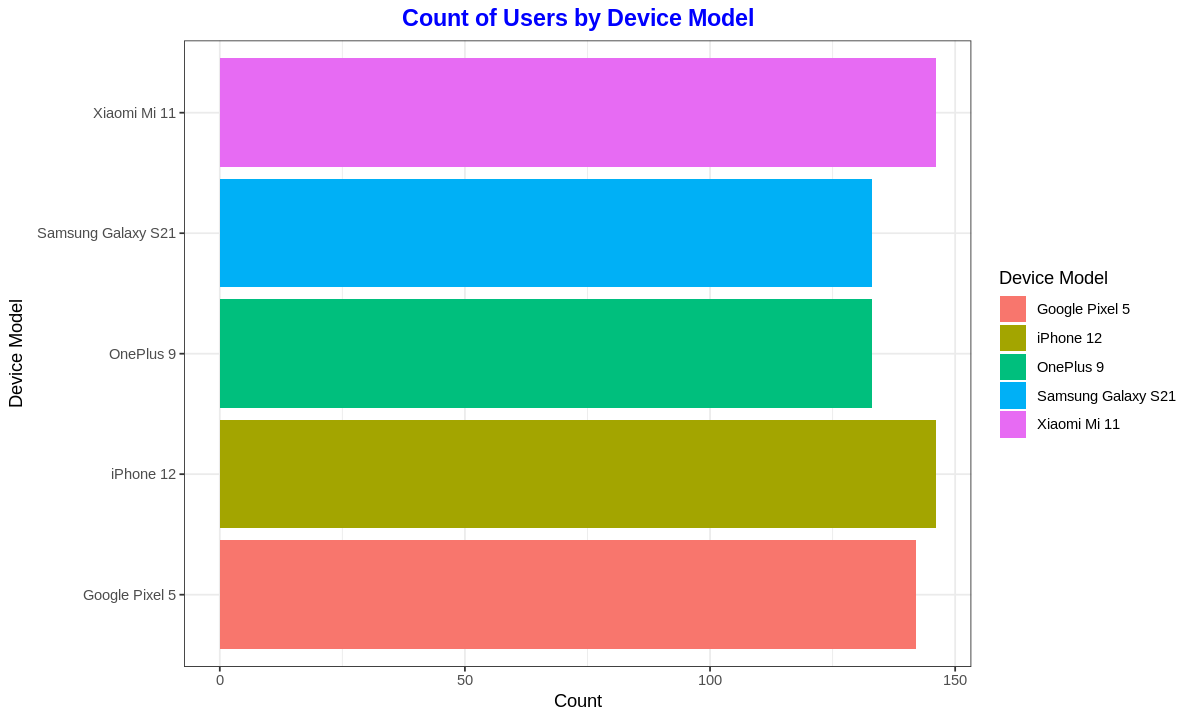

In [13]:
# Count of Users by Device Model

options(repr.plot.width = 10, repr.plot.height = 6)
ggplot(data, mapping = aes(x = `Device Model` , fill = `Device Model`)) +
    geom_bar() +
    coord_flip() +
    labs(title = "Count of Users by Device Model", x = "Device Model", y = "Count") +
    theme_bw() +
    theme(plot.title = element_text(hjust = 0.5, size = 14, color = "Blue", face = "bold"))

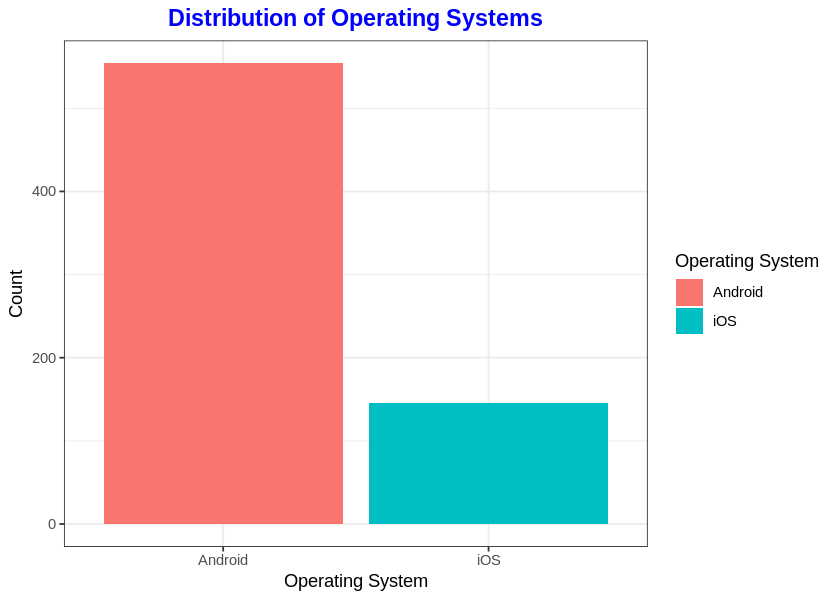

In [14]:
# Distribution of Operating Systems

options(repr.plot.width = 7, repr.plot.height = 5)
ggplot(data, mapping = aes(x = `Operating System` , fill = `Operating System`)) +
    geom_bar() +
    labs(title = "Distribution of Operating Systems", x = "Operating System", y = "Count") +
    theme_bw() +
    theme(plot.title = element_text(hjust = 0.5, size = 14, color = "Blue", face = "bold"))

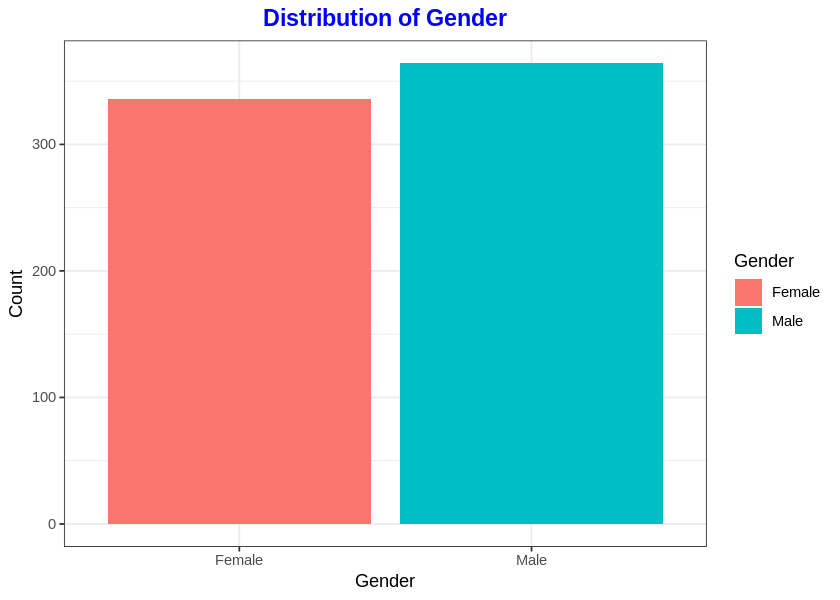

In [15]:
# Distribution of Gender

options(repr.plot.width = 7, repr.plot.height = 5)
ggplot(data, mapping = aes(x = `Gender` , fill = `Gender`)) +
    geom_bar() +
    labs(title = "Distribution of Gender", x = "Gender", y = "Count") +
    theme_bw() +
    theme(plot.title = element_text(hjust = 0.5, size = 14, color = "Blue", face = "bold"))

## ***Bivariate Analysis***

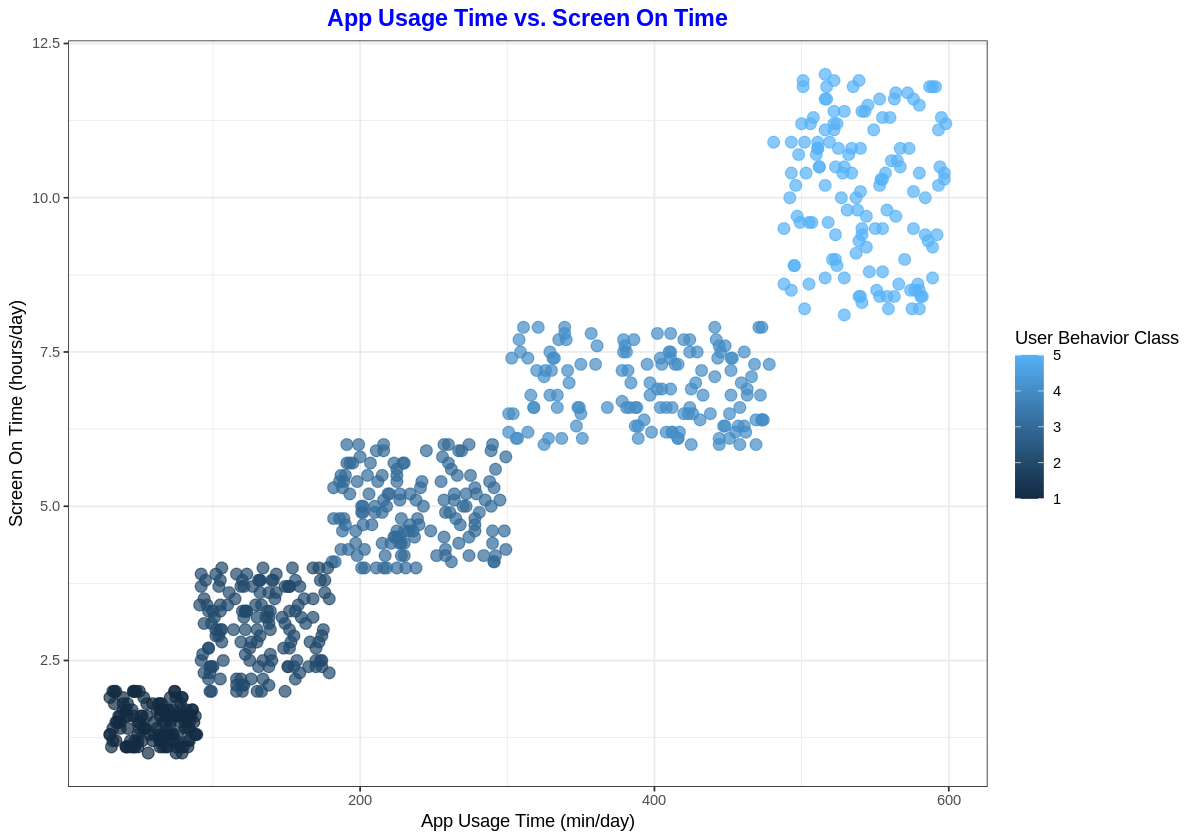

In [16]:
# App Usage Time vs. Screen On Time

options(repr.plot.width = 10, repr.plot.height = 7)
ggplot(data, mapping = aes(x = `App Usage Time (min/day)`, y = `Screen On Time (hours/day)`, col = `User Behavior Class`)) +
  geom_point(size = 3, alpha = 0.7) +
  labs(title = "App Usage Time vs. Screen On Time") +
  theme_bw() +
  theme(plot.title = element_text(hjust = 0.5, size = 14, color = "Blue", face = "bold"))

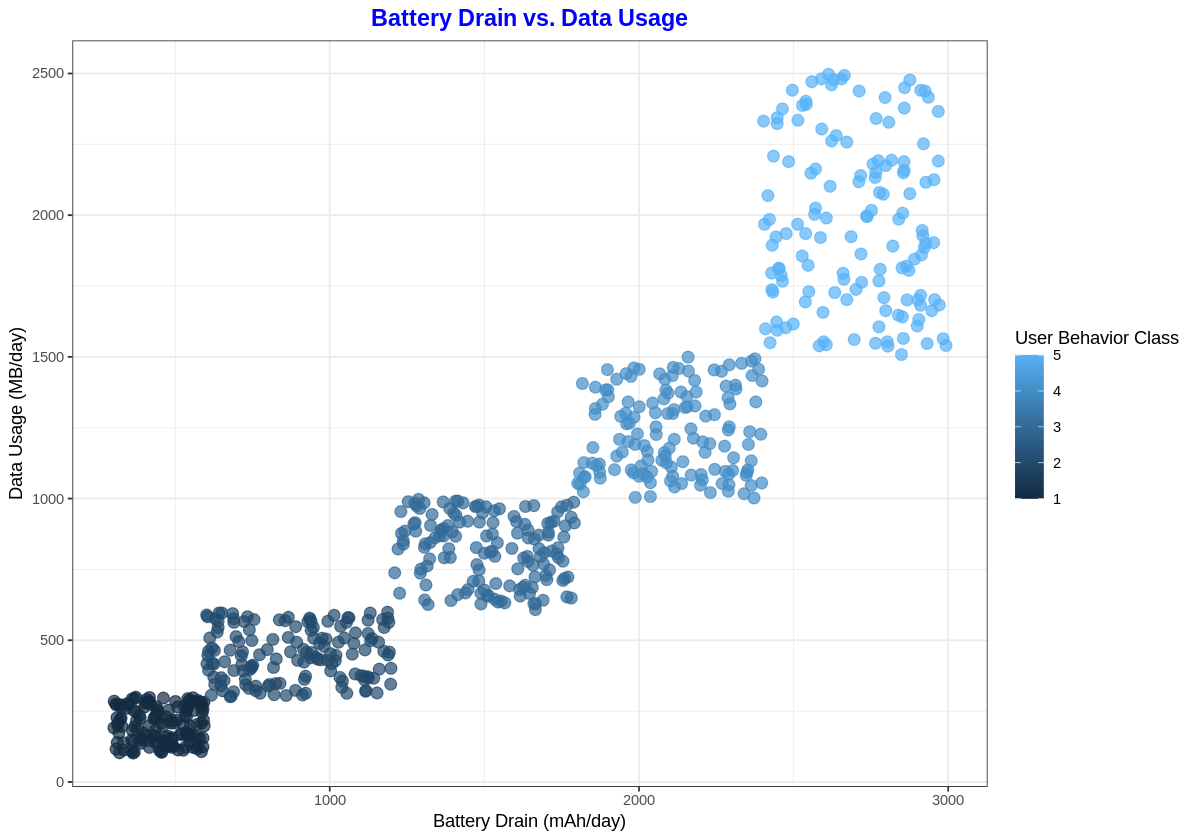

In [17]:
# Battery Drain vs. Data Usage

options(repr.plot.width = 10, repr.plot.height = 7)
ggplot(data, mapping = aes(x = `Battery Drain (mAh/day)`, y = `Data Usage (MB/day)`, col = `User Behavior Class`)) +
  geom_point(size = 3, alpha = 0.7) +
  labs(title = "Battery Drain vs. Data Usage") +
  theme_bw() +
  theme(plot.title = element_text(hjust = 0.5, size = 14, color = "Blue", face = "bold"))

`geom_smooth()` using formula = 'y ~ x'


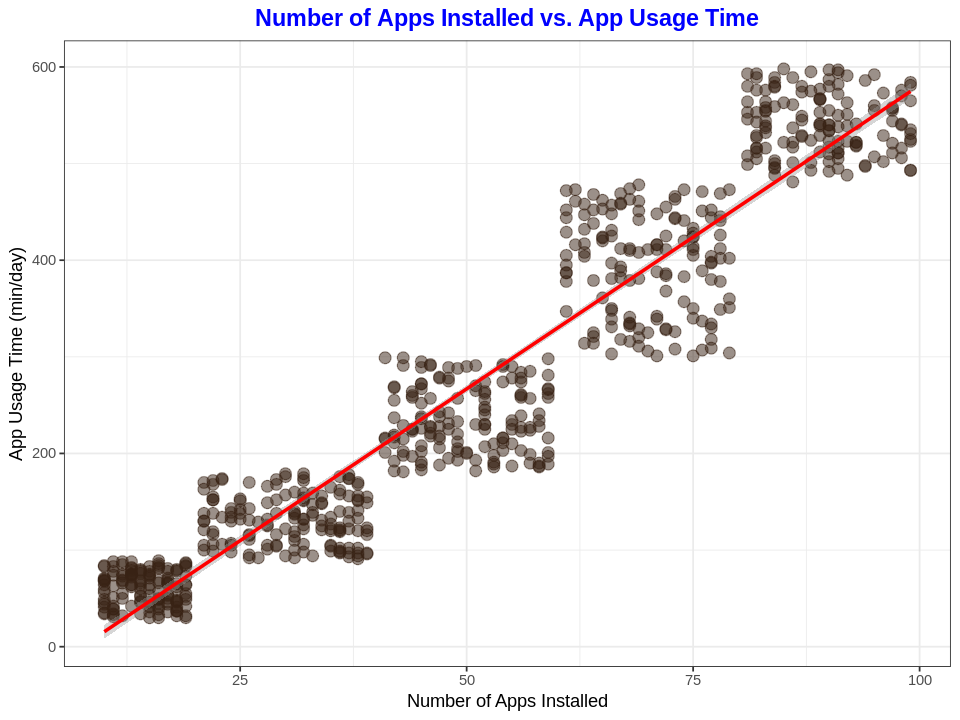

In [18]:
# Number of Apps Installed vs. App Usage Time

options(repr.plot.width = 8, repr.plot.height = 6)
ggplot(data, mapping = aes(x = `Number of Apps Installed`, y = `App Usage Time (min/day)`)) +
  geom_point(size = 3, alpha = 0.5, col = "#382214") +
  geom_smooth(method = "lm",col ="red") +
  labs(title = "Number of Apps Installed vs. App Usage Time") +
  theme_bw() +
  theme(plot.title = element_text(hjust = 0.5, size = 14, color = "Blue", face = "bold"))

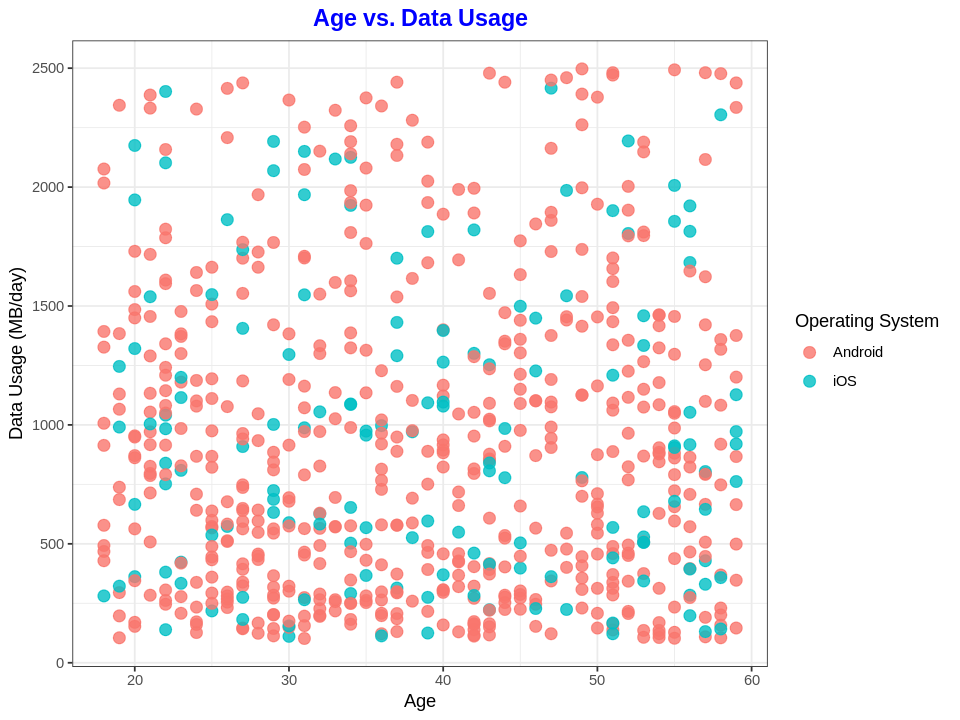

In [19]:
# Age vs. Data Usage

options(repr.plot.width = 8, repr.plot.height = 6)
ggplot(data, mapping = aes(x = `Age`, y = `Data Usage (MB/day)`, col = `Operating System`)) +
  geom_point(size = 3, alpha = 0.8) +
  labs(title = "Age vs. Data Usage") +
  theme_bw() +
  theme(plot.title = element_text(hjust = 0.5, size = 14, color = "Blue", face = "bold"))

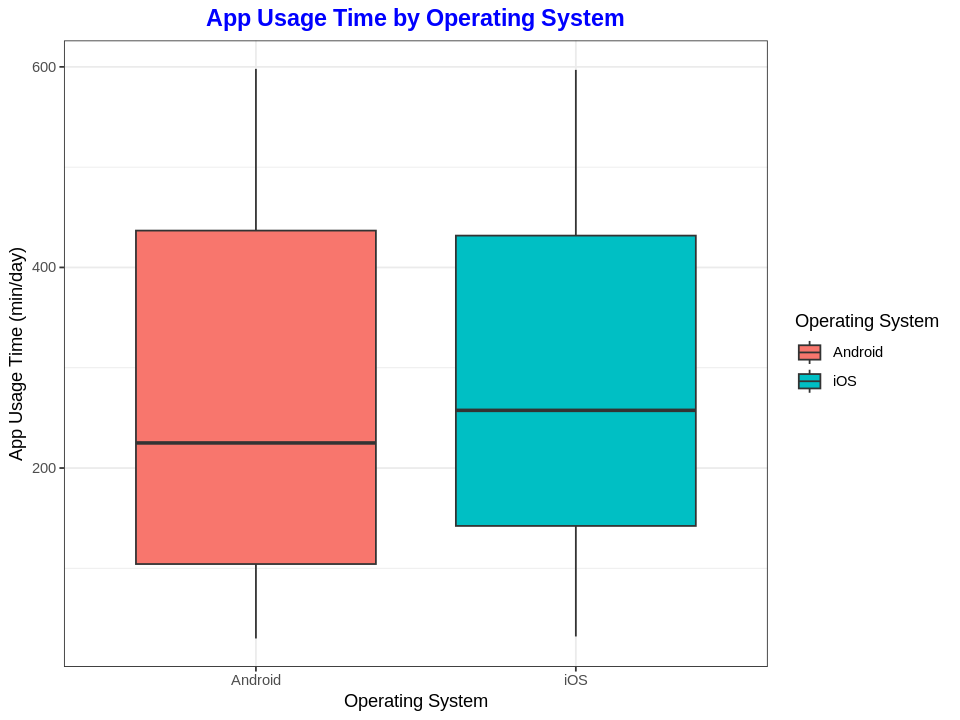

In [20]:
# Boxplot of Battery Drain by Gender

options(repr.plot.width = 8, repr.plot.height = 6)
ggplot(data, mapping = aes(x = `Operating System`, y = `App Usage Time (min/day)`, fill = `Operating System`)) +
    geom_boxplot() +
    labs(title = "App Usage Time by Operating System", x = "Operating System", y ="App Usage Time (min/day)" ) +
    theme_bw() +
    theme(plot.title = element_text(hjust = 0.5, size = 14, color = "Blue", face = "bold"))

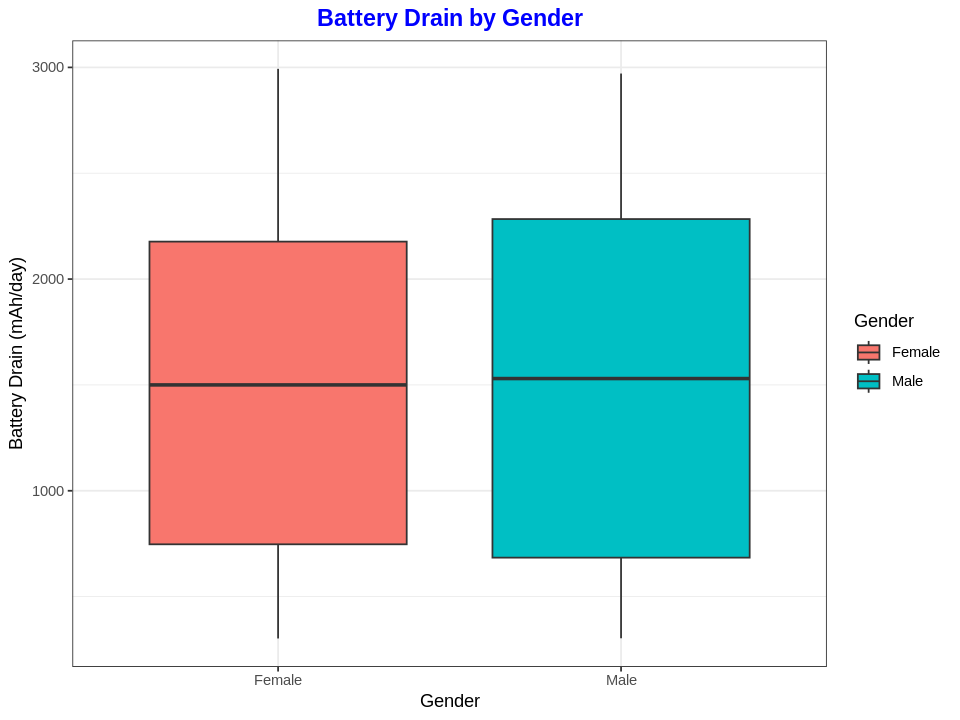

In [21]:
# Boxplot of Battery Drain by Gender

options(repr.plot.width = 8, repr.plot.height = 6)
ggplot(data, mapping = aes(x = `Gender`, y = `Battery Drain (mAh/day)`, fill = `Gender`)) +
    geom_boxplot() +
    labs(title = "Battery Drain by Gender", x = "Gender", y ="Battery Drain (mAh/day)" ) +
    theme_bw() +
    theme(plot.title = element_text(hjust = 0.5, size = 14, color = "Blue", face = "bold"))

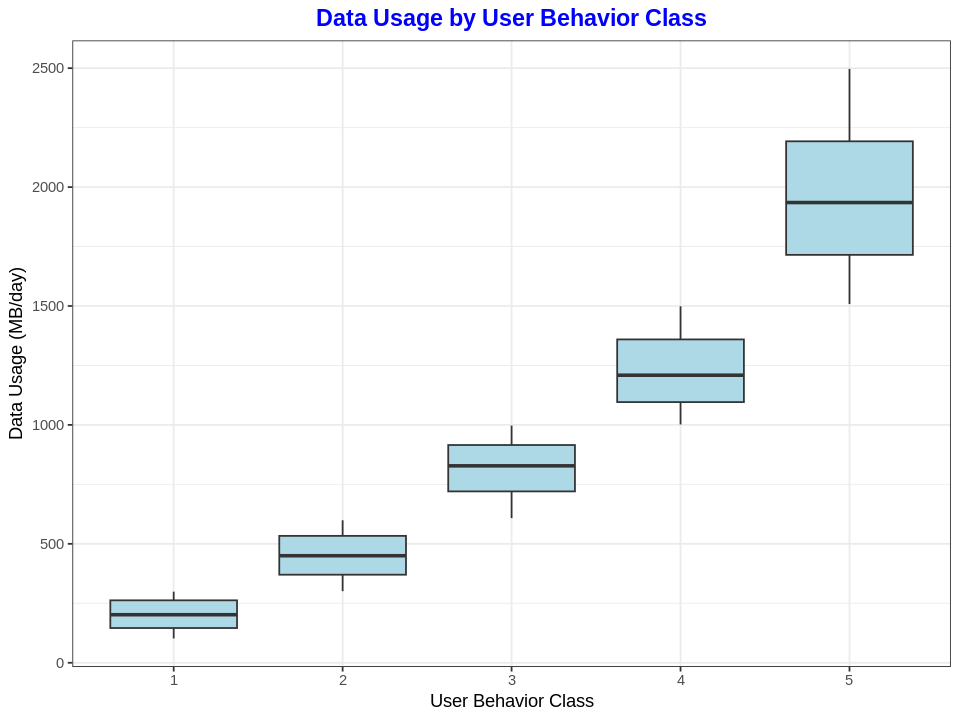

In [34]:
# Boxplot of Data Usage by User Behavior Class

options(repr.plot.width = 8, repr.plot.height = 6)
ggplot(data, mapping = aes(x = factor(`User Behavior Class`), y = `Data Usage (MB/day)`)) +
    geom_boxplot(fill = "lightblue") +
    labs(title = "Data Usage by User Behavior Class", x = "User Behavior Class", y ="Data Usage (MB/day)" ) +
    theme_bw() +
    theme(plot.title = element_text(hjust = 0.5, size = 14, color = "Blue", face = "bold"))

## ***Analysis Data***

**1. Most Viewed App**

In [76]:
# Group by 'Device Model' and sum the 'App Usage Time (min/day)'
most_viewed_app <- data %>%
  group_by(`Device Model`) %>%
  summarise(`App Usage Time (min/day)` = sum(`App Usage Time (min/day)`))

# Find the app with the maximum usage time
max_usage_row <- most_viewed_app[which.max(most_viewed_app$`App Usage Time (min/day)`), ]

# Print the entire table
print("Total App Usage Time by Device Model:")
print(most_viewed_app)

# Print the result for the most viewed app
print(paste0("The most viewed app is from Device Model: ", max_usage_row$`Device Model`,
              " with a total usage time of ", max_usage_row$`App Usage Time (min/day)`, " minutes."))

[1] "Total App Usage Time by Device Model:"
# A tibble: 5 × 2
  `Device Model`     `App Usage Time (min/day)`
  <chr>                                   <dbl>
1 Google Pixel 5                          38026
2 OnePlus 9                               35961
3 Samsung Galaxy S21                      35434
4 Xiaomi Mi 11                            39194
5 iPhone 12                               41175
[1] "The most viewed app is from Device Model: iPhone 12 with a total usage time of 41175 minutes."


**2. Calculate and Sort Average Battery Drain by Device Model**

In [81]:
# Group by 'Device Model' and average the 'Battery Drain (mAh/day)'
most_viewed_app <- data %>%
  group_by(`Device Model`) %>%
  summarise(`Battery Drain (mAh/day)` = mean(`Battery Drain (mAh/day)`)) %>%
  arrange(desc(`Battery Drain (mAh/day)`))

# Print the entire table
print("Average Battery Drain by Device Model::")
print(most_viewed_app)

[1] "Average Battery Drain by Device Model::"
# A tibble: 5 × 2
  `Device Model`     `Battery Drain (mAh/day)`
  <chr>                                  <dbl>
1 iPhone 12                              1590.
2 Xiaomi Mi 11                           1529.
3 OnePlus 9                              1524.
4 Samsung Galaxy S21                     1505.
5 Google Pixel 5                         1476.


**3. Find and Sort Maximum Age by Device Model**

In [83]:
# Group by 'Device Model' and hightest of 'Age'
highest_age_by_device <- data %>%
                            group_by(`Device Model`) %>%
                            summarise(`Highest Age` = max(`Age`)) %>%
                            arrange(desc(`Highest Age`))

# Print the entire table
print("Highest Age for Each Device Model:")
print(highest_age_by_device)

[1] "Highest Age for Each Device Model:"
# A tibble: 5 × 2
  `Device Model`     `Highest Age`
  <chr>                      <dbl>
1 Google Pixel 5                59
2 OnePlus 9                     59
3 Samsung Galaxy S21            59
4 Xiaomi Mi 11                  59
5 iPhone 12                     59


**4. Count User Distribution by Device Model and Gender**

In [90]:
#read file
data = read_csv('user_behavior_dataset.csv')

# Group by Group by 'Device Model' and 'Gender' and count the 'Number of users'
gender_distribution <- data %>%
                        group_by(`Device Model`,`Gender`) %>%
                        summarise(`Number of Users` = n()) %>%
                        arrange(`Device Model`,`Gender`)

# Print the entire table
print("Number of Users by Device Model and Gender:")
print(gender_distribution)

Rows: 700 Columns: 11
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): Device Model, Operating System, Gender
dbl (8): User ID, App Usage Time (min/day), Screen On Time (hours/day), Batt...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
`summarise()` has grouped output by 'Device Model'. You can override using the
`.groups` argument.


[1] "Number of Users by Device Model and Gender:"
# A tibble: 10 × 3
# Groups:   Device Model [5]
   `Device Model`     Gender `Number of Users`
   <chr>              <chr>              <int>
 1 Google Pixel 5     Female                69
 2 Google Pixel 5     Male                  73
 3 OnePlus 9          Female                61
 4 OnePlus 9          Male                  72
 5 Samsung Galaxy S21 Female                54
 6 Samsung Galaxy S21 Male                  79
 7 Xiaomi Mi 11       Female                78
 8 Xiaomi Mi 11       Male                  68
 9 iPhone 12          Female                74
10 iPhone 12          Male                  72


**5. Calculate User Count and Average Age by Device Model and Gender**

In [97]:
# Group by Group by 'Device Model' and 'Gender' and calculate the 'Number of users' and 'average age'
age_gender_distribution <- data %>%
                        group_by(`Device Model`,`Gender`) %>%
                        summarise(`Number of Users` = n(), `Average_Age` = mean(`Age`)) %>%
                        arrange(`Device Model`,`Gender`)

# Print the entire table
print("Number of Users and Average Age by Device Model and Gender:")
print(age_gender_distribution)

`summarise()` has grouped output by 'Device Model'. You can override using the
`.groups` argument.


[1] "Number of Users and Average Age by Device Model and Gender:"
# A tibble: 10 × 4
# Groups:   Device Model [5]
   `Device Model`     Gender `Number of Users` Average_Age
   <chr>              <chr>              <int>       <dbl>
 1 Google Pixel 5     Female                69        37.8
 2 Google Pixel 5     Male                  73        37.7
 3 OnePlus 9          Female                61        40  
 4 OnePlus 9          Male                  72        37.9
 5 Samsung Galaxy S21 Female                54        36.9
 6 Samsung Galaxy S21 Male                  79        40.6
 7 Xiaomi Mi 11       Female                78        38  
 8 Xiaomi Mi 11       Male                  68        37.5
 9 iPhone 12          Female                74        39.1
10 iPhone 12          Male                  72        38.8


**6. Calculate apps**

In [95]:
# Group by Group by 'Device Model' and 'Gender' and and calculate "Average apps installed"
apps_installed_distribution <- data %>%
                                group_by(`Device Model`,`Gender`) %>%
                                summarise(`Number of Apps Installed` = mean(`Number of Apps Installed`)) %>%
                                arrange(`Device Model`,`Gender`)

# Print the entire table
print(apps_installed_distribution)

`summarise()` has grouped output by 'Device Model'. You can override using the
`.groups` argument.


[1] "Number of Users by Device Model and Gender:"
# A tibble: 10 × 3
# Groups:   Device Model [5]
   `Device Model`     Gender `Number of Apps Installed`
   <chr>              <chr>                       <dbl>
 1 Google Pixel 5     Female                       47.3
 2 Google Pixel 5     Male                         52.4
 3 OnePlus 9          Female                       48.2
 4 OnePlus 9          Male                         51.4
 5 Samsung Galaxy S21 Female                       53.4
 6 Samsung Galaxy S21 Male                         49.1
 7 Xiaomi Mi 11       Female                       49.7
 8 Xiaomi Mi 11       Male                         50.2
 9 iPhone 12          Female                       52.9
10 iPhone 12          Male                         52.6


**7. Average Data Usage (MB/day) by Device Model**

In [101]:
# Group by Group by 'Device Model' and 'Gender' and and calculate "Average apps installed"
average_data_usage <- data %>%
                        group_by(`Device Model`) %>%
                        summarise(`Data Usage (MB/day)` = mean(`Data Usage (MB/day)`))

# Print the entire table
print("Average Data Usage (MB/day) by Device Model:")
print(average_data_usage)

[1] "Average Data Usage (MB/day) by Device Model:"
# A tibble: 5 × 2
  `Device Model`     `Data Usage (MB/day)`
  <chr>                              <dbl>
1 Google Pixel 5                      898.
2 OnePlus 9                           911.
3 Samsung Galaxy S21                  932.
4 Xiaomi Mi 11                        940.
5 iPhone 12                           966.
